In [ ]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score
)
import torch

sys.path.append("../")

from fwc2.model import FWC2Pretrainer, FWC2V2
from fwc2.data import load, preprocess

SEED = 42

In [ ]:
for i in range(0, 2, ):
    print(i)

0
1


In [8]:
selected_featurs = ['flow_duration', 'total_fwd_packets', 'total_backward_packets',
       'total_length_of_fwd_packets', 'total_length_of_bwd_packets',
       'fwd_packet_length_max', 'fwd_packet_length_min',
       'fwd_packet_length_mean', 'fwd_packet_length_std',
       'bwd_packet_length_max', 'bwd_packet_length_min',
       'bwd_packet_length_mean', 'bwd_packet_length_std', 'flow_bytes/s',
       'flow_packets/s', 'flow_iat_mean', 'flow_iat_std', 'flow_iat_max',
       'flow_iat_min', 'fwd_iat_total', 'fwd_iat_mean', 'fwd_iat_std',
       'fwd_iat_max', 'fwd_iat_min', 'bwd_iat_total', 'bwd_iat_mean',
       'bwd_iat_std', 'bwd_iat_max', 'bwd_iat_min', 'fwd_psh_flags',
       'fwd_urg_flags', 'fwd_header_length', 'bwd_header_length',
       'fwd_packets/s', 'bwd_packets/s', 'min_packet_length',
       'max_packet_length', 'packet_length_mean', 'packet_length_std',
       'packet_length_variance', 'fin_flag_count', 'syn_flag_count',
       'rst_flag_count', 'psh_flag_count', 'ack_flag_count', 'urg_flag_count',
       'cwr_flag_count', 'ece_flag_count', 'down/up_ratio',
       'average_packet_size', 'avg_fwd_segment_size', 'avg_bwd_segment_size',
       'subflow_fwd_packets', 'subflow_fwd_bytes', 'subflow_bwd_packets',
       'subflow_bwd_bytes', 'init_win_bytes_forward',
       'init_win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'active_mean', 'active_std', 'active_max', 'active_min', 'idle_mean',
       'idle_std', 'idle_max', 'idle_min', 'label']

In [5]:
dapat20_df = load('dapt20', base_dir='../datasets')

base_dir = ../datasets\dapt20
['all.csv'] 1
all.csv shape of data = (86690, 86)


In [6]:
dapat20_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86690 entries, 0 to 86689
Data columns (total 85 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   source.name                  86690 non-null  object 
 1   flow_id                      82577 non-null  object 
 2   src_ip                       82577 non-null  object 
 3   src_port                     82577 non-null  float64
 4   dst_ip                       82577 non-null  object 
 5   dst_port                     82577 non-null  float64
 6   protocol                     82577 non-null  float64
 7   timestamp                    82577 non-null  object 
 8   flow_duration                82577 non-null  float64
 9   total_fwd_packets            82577 non-null  float64
 10  total_backward_packets       82577 non-null  float64
 11  total_length_of_fwd_packets  82577 non-null  float64
 12  total_length_of_bwd_packets  82577 non-null  float64
 13  fwd_packet_lengt

In [7]:
dapat20_df = preprocess(dapat20_df, pretraining=True)

selected featurs = Index(['flow_duration', 'total_fwd_packets', 'total_backward_packets',
       'total_length_of_fwd_packets', 'total_length_of_bwd_packets',
       'fwd_packet_length_max', 'fwd_packet_length_min',
       'fwd_packet_length_mean', 'fwd_packet_length_std',
       'bwd_packet_length_max', 'bwd_packet_length_min',
       'bwd_packet_length_mean', 'bwd_packet_length_std', 'flow_bytes/s',
       'flow_packets/s', 'flow_iat_mean', 'flow_iat_std', 'flow_iat_max',
       'flow_iat_min', 'fwd_iat_total', 'fwd_iat_mean', 'fwd_iat_std',
       'fwd_iat_max', 'fwd_iat_min', 'bwd_iat_total', 'bwd_iat_mean',
       'bwd_iat_std', 'bwd_iat_max', 'bwd_iat_min', 'bwd_psh_flags',
       'fwd_header_length', 'bwd_header_length', 'fwd_packets/s',
       'bwd_packets/s', 'min_packet_length', 'max_packet_length',
       'packet_length_mean', 'packet_length_std', 'packet_length_variance',
       'fin_flag_count', 'syn_flag_count', 'rst_flag_count', 'psh_flag_count',
       'ack_flag_count',

In [8]:
dapat20_df.shape

(82577, 65)

In [9]:
dapat20_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82577 entries, 0 to 86689
Data columns (total 65 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   flow_duration                82577 non-null  float64
 1   total_fwd_packets            82577 non-null  float64
 2   total_backward_packets       82577 non-null  float64
 3   total_length_of_fwd_packets  82577 non-null  float64
 4   total_length_of_bwd_packets  82577 non-null  float64
 5   fwd_packet_length_max        82577 non-null  float64
 6   fwd_packet_length_min        82577 non-null  float64
 7   fwd_packet_length_mean       82577 non-null  float64
 8   fwd_packet_length_std        82577 non-null  float64
 9   bwd_packet_length_max        82577 non-null  float64
 10  bwd_packet_length_min        82577 non-null  float64
 11  bwd_packet_length_mean       82577 non-null  float64
 12  bwd_packet_length_std        82577 non-null  float64
 13  flow_bytes/s         

In [10]:
x, y = dapat20_df.drop(columns=['label']), dapat20_df['label'] 

In [11]:
v1_encoder_hidden_dims = [64, 32, 16, 8]
v1_project_hidden_dims = [16, 16]

v2_encoder_hidden_dims = [64, 128, 64, 32]
v2_project_hidden_dims = [16, 16]

encoder_dims = [256, 256, 256, 256]
projecter_dims = [128, 128]

model = FWC2Pretrainer(
        input_dim=64,
        features_low=0,
        features_high=0,
        dims_hidden_encoder=encoder_dims,
        dims_hidden_head=projecter_dims,
        corruption_rate=0.4,
        dropout=0.1,
)

# model1 = FWC2(
#     input_dim=68,
#     features_low=0,
#     features_high=0,
#     dims_hidden_encoder=v1_encoder_hidden_dims,
#     dims_hidden_head=v1_project_hidden_dims,
#     corruption_rate=0.4,
#     dropout=0.1,
# )

# model2 = FWC2V2(
#     input_dim=68,
#     features_low=0,
#     features_high=0,
#     dims_hidden_encoder=v2_encoder_hidden_dims,
#     dims_hidden_head=v2_project_hidden_dims,
#     corruption_rate=0.4,
#     dropout=0.1,
# )

# model1.load_state_dict(torch.load('../output/kaggle/fwc2--whp(cp=0.4,tau=1.0).pt', map_location=torch.device('cpu') ))
# model2.load_state_dict(torch.load('../output/kaggle/fwc2-v2--whp(cp=0.4,tau=0.5).pt', map_location=torch.device('cpu') ))
model.load_state_dict(torch.load('../fcw2-best--w(cp=0.4,tau=1.0).pt', map_location=torch.device('cpu') ))

<All keys matched successfully>

In [16]:
def train_eval(x, y, emb_model = None):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=SEED, stratify=y)
    
    if emb_model:
        x_train = emb_model.get_embeddings(torch.tensor(x_train.values, dtype=torch.float32))
        x_test = emb_model.get_embeddings(torch.tensor(x_test.values, dtype=torch.float32))
        
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)    
        
    
    encoder = LabelEncoder()
    y_train = encoder.fit_transform(y_train)
    y_test = encoder.transform(y_test)
    
    model = LogisticRegression(
        solver='lbfgs',
        max_iter=1000,
        random_state=SEED
    )
    
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    conf_matrix = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(conf_matrix)
    
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\nPrecision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

In [17]:
train_eval(x, y)

Accuracy: 0.8808

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     12383
           1       0.00      0.00      0.00         3
           2       0.75      0.85      0.79      1721
           3       1.00      0.04      0.07        27
           4       0.70      0.61      0.65      2382

    accuracy                           0.88     16516
   macro avg       0.68      0.49      0.49     16516
weighted avg       0.88      0.88      0.88     16516


Confusion Matrix:
[[11626     0   158     0   599]
 [    1     0     0     0     2]
 [  238     0  1461     0    22]
 [   19     0     1     1     6]
 [  582     0   341     0  1459]]

Precision: 0.8793
Recall: 0.8808
F1 Score: 0.8785


c:\Users\client\Projects\PhD\FWC2L\.envs\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\client\Projects\PhD\FWC2L\.envs\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\client\Projects\PhD\FWC2L\.envs\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [18]:
train_eval(x, y, emb_model=model1)

Accuracy: 0.7498

Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     12383
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00      1721
           3       0.00      0.00      0.00        27
           4       0.00      0.00      0.00      2382

    accuracy                           0.75     16516
   macro avg       0.15      0.20      0.17     16516
weighted avg       0.56      0.75      0.64     16516


Confusion Matrix:
[[12383     0     0     0     0]
 [    3     0     0     0     0]
 [ 1721     0     0     0     0]
 [   27     0     0     0     0]
 [ 2382     0     0     0     0]]

Precision: 0.5621
Recall: 0.7498
F1 Score: 0.6425


c:\Users\client\Projects\PhD\FWC2L\.envs\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\client\Projects\PhD\FWC2L\.envs\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\client\Projects\PhD\FWC2L\.envs\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [19]:
train_eval(x, y, emb_model=model2)

Accuracy: 0.7498

Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     12383
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00      1721
           3       0.00      0.00      0.00        27
           4       0.00      0.00      0.00      2382

    accuracy                           0.75     16516
   macro avg       0.15      0.20      0.17     16516
weighted avg       0.56      0.75      0.64     16516


Confusion Matrix:
[[12383     0     0     0     0]
 [    3     0     0     0     0]
 [ 1721     0     0     0     0]
 [   27     0     0     0     0]
 [ 2382     0     0     0     0]]

Precision: 0.5621
Recall: 0.7498
F1 Score: 0.6425


c:\Users\client\Projects\PhD\FWC2L\.envs\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\client\Projects\PhD\FWC2L\.envs\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\client\Projects\PhD\FWC2L\.envs\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [20]:
np.random.seed(SEED)

sample_size = 10_000
sample_idx = np.random.choice(x.shape[0], sample_size, replace=False)

sample_x = x.iloc[sample_idx]
sample_y = y.iloc[sample_idx]

sample_y_binary = sample_y.apply(lambda x: 0 if x == 'benign' else 1)

sample_x.shape , sample_y.shape

((10000, 68), (10000,))

In [12]:
from sklearn.manifold import TSNE
import seaborn as sns

y_binary = y.apply(lambda x: 0 if x == 'benign' else 1)
x_tensor = torch.tensor(x.values, dtype=torch.float32)

x_emb = model.get_embeddings(x_tensor)
# x_emb_v1 = model1.get_embeddings(x_tensor)
# x_emb_v2 = model2.get_embeddings(x_tensor)

x_emb.shape

torch.Size([82577, 256])

In [13]:
n_componets = 2
tsne = TSNE(n_components=n_componets)
tsne_original = tsne.fit_transform(x_tensor)
tsne_v1_result = tsne.fit_transform(x_emb)

tsne_result_original_df = pd.DataFrame({
    'tsne_1': tsne_original[:, 0],
    'tsne_2': tsne_original[:, 1],
    'label': sample_y_binary,
})

tsne_result_v1_df = pd.DataFrame({
    'tsne_1': tsne_v1_result[:, 0],
    'tsne_2': tsne_v1_result[:, 1],
    'label': sample_y_binary,
})

NameError: name 'sample_y_binary' is not defined

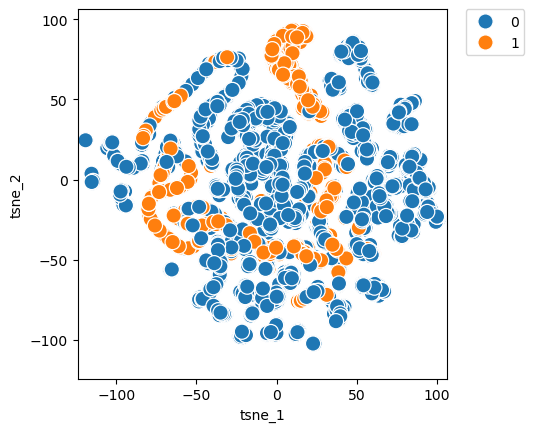

In [22]:
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_original_df, ax=ax,s=120)
lim = (tsne_original.min()-5, tsne_original.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

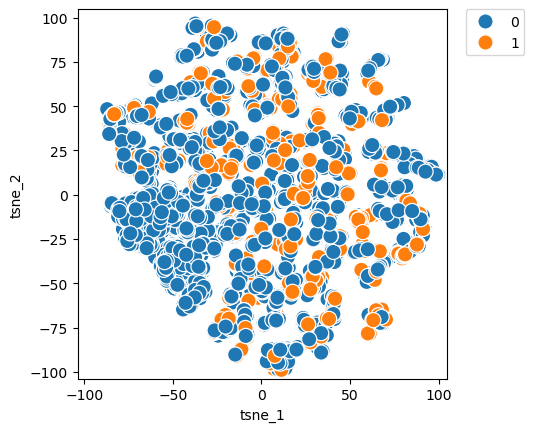

In [23]:
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_v1_df, ax=ax,s=120)
lim = (tsne_v1_result.min()-5, tsne_v1_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

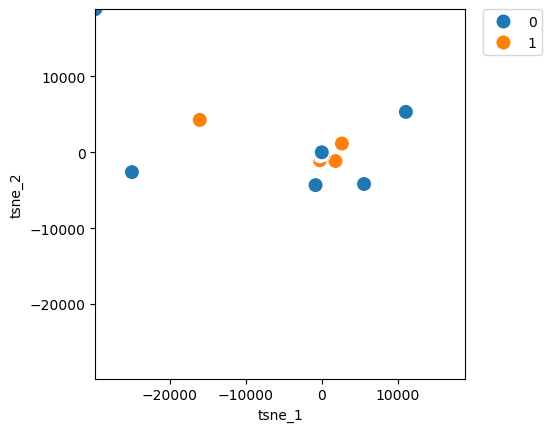

In [24]:
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_v2_df, ax=ax,s=120)
lim = (tsne_v2_result.min()-5, tsne_v2_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)